### モジュールインポート

In [69]:
import sys
print(sys.version)

3.12.7 (main, Jan 20 2025, 16:37:23) [Clang 16.0.0 (clang-1600.0.26.4)]


In [2]:
import requests
import time
import sqlite3
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import japanize_matplotlib

### スクレイピング

In [71]:
# スクレイピング先のURL
url = "https://onsen.nifty.com/kanto/search/?darea=03&text=&srt=a1&kkavg=0&pricelow=&pricehigh=&c3=1024"

# ユーザーエージェントを設定してリクエストを送信
headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36"
}

try:
    response = requests.get(url, headers=headers)
    
    print(f"ステータスコード: {response.status_code}")
    
    # ステータスコードが200の場合
    if response.status_code == 200:
        # BeautifulSoupを使ってHTMLを解析
        soup = BeautifulSoup(response.text, "html.parser")
        
        # HTML全体の最初の500文字を表示
        print("HTMLの一部:")
        print(soup.prettify()[:500])
        
        # ページのタイトルを取得して表示
        if soup.title:
            print(f"ページタイトル: {soup.title.string}")
        else:
            print("タイトルが見つかりませんでした。")
        
    else:
        print("正常にアクセスできませんでした。")

except requests.exceptions.RequestException as e:
    print(f"リクエスト中にエラーが発生しました: {e}")


ステータスコード: 200
HTMLの一部:
<!DOCTYPE html>
<html lang="ja">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   【クーポンあり】関東地方の温泉、日帰り温泉、スーパー銭湯おすすめ30選【2025年度版】｜ニフティ温泉
  </title>
  <meta content="関東,群馬,東京,温泉,日帰り温泉,スーパー銭湯,検索,比較,クーポン,ニフティ温泉" name="keywords">
   <meta content="お得な割引クーポンを多数掲載！関東地方(群馬,東京等)の温泉、日帰り温泉、スーパー銭湯、スパ、サウナ、銭湯を探すならニフティ温泉。口コミやランキングから、あなたにピッタリの温泉が見つかります。" name="description"/>
   <link href="/css/iconfont.min.css" rel="stylesheet" type="text/css"/>
   <link href="/css/rene
ページタイトル: 【クーポンあり】関東地方の温泉、日帰り温泉、スーパー銭湯おすすめ30選【2025年度版】｜ニフティ温泉


In [72]:
# 一旦訪問予定のURLをスクレイピング
# その後、各施設のURLにアクセスして、詳細情報を取得する

base_url = "https://onsen.nifty.com/"
full_urls = []

# 複数ページをループ
for i in range(1, 11):  
    url = f"https://onsen.nifty.com/kanto/search/page-{i}/?darea=03&text=&srt=a1&kkavg=0&pricelow=&pricehigh=&c3=1024"
    
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, "html.parser")
    
    # <a>タグがついたのを取得
    atags = soup.find_all("a", class_="overlayLink spotOverlay")
    
    for link in atags[1:]: # [1:]で最初の要素をスキップ
        href = link.get("href")
        if href:
            # フルURLに変換して表示
            full_url = urljoin(base_url, href)
            full_urls.append(full_url)
            

print(full_urls)

['https://onsen.nifty.com/saitamashi-onsen/onsen012278/', 'https://onsen.nifty.com/yokohama-onsen/onsen008577/', 'https://onsen.nifty.com/souka-onsen/onsen012366/', 'https://onsen.nifty.com/kawasaki-onsen/onsen007460/', 'https://onsen.nifty.com/tsukuba-onsen/onsen016204/', 'https://onsen.nifty.com/higashimatsuyama-onsen/onsen005745/', 'https://onsen.nifty.com/utsunomiya-onsen/onsen012383/', 'https://onsen.nifty.com/yokohama-onsen/onsen011489/', 'https://onsen.nifty.com/shounan-onsen/onsen009500/', 'https://onsen.nifty.com/kumagaya-onsen/onsen012480/', 'https://onsen.nifty.com/saitamashi-onsen/onsen006963/', 'https://onsen.nifty.com/kawasaki-onsen/onsen007934/', 'https://onsen.nifty.com/hannou-onsen/onsen008660/', 'https://onsen.nifty.com/asakusa-onsen/onsen001483/', 'https://onsen.nifty.com/kuki-onsen/onsen010231/', 'https://onsen.nifty.com/yokohama-onsen/onsen006655/', 'https://onsen.nifty.com/chiba-onsen/onsen016626/', 'https://onsen.nifty.com/mito-onsen/onsen011465/', 'https://onsen

In [73]:
# 一旦訪問予定のURLをスクレイピング
# その後、各施設のURLにアクセスして、詳細情報を取得する
for i in range(0, 1):
    url = f"https://onsen.nifty.com/kanto/search/page-{i}/?darea=03&text=&srt=a1&kkavg=0&pricelow=&pricehigh=&c3=1024"

    response = requests.get(url)
    response.raise_for_status()  # エラーチェック
    soup = BeautifulSoup(response.text, "html.parser")

# <a>タグがついたのを取得
atags = soup.find_all("a", class_="overlayLink spotOverlay")
    
# 変数(link)に格納された<a>タグのhref属性を取得して表示
for link in atags[1:]:  # [1:]で最初の要素をスキップ
    href = link.get("href")
    print(href)

/saitamashi-onsen/onsen012278/
/yokohama-onsen/onsen008577/
/souka-onsen/onsen012366/
/kawasaki-onsen/onsen007460/
/tsukuba-onsen/onsen016204/
/higashimatsuyama-onsen/onsen005745/
/utsunomiya-onsen/onsen012383/
/yokohama-onsen/onsen011489/
/shounan-onsen/onsen009500/
/kumagaya-onsen/onsen012480/
/saitamashi-onsen/onsen006963/
/kawasaki-onsen/onsen007934/
/hannou-onsen/onsen008660/
/asakusa-onsen/onsen001483/
/kuki-onsen/onsen010231/
/yokohama-onsen/onsen006655/
/chiba-onsen/onsen016626/
/mito-onsen/onsen011465/
/hachiouji-onsen/onsen012129/
/yokosuka-onsen/onsen009819/
/kasukabe-onsen/onsen006502/
/kawasaki-onsen/onsen006458/
/hakone-onsen/onsen001513/
/itabashi-onsen/onsen006893/
/kashiwa-onsen/onsen017050/
/sakura-onsen/onsen012078/
/chiba-onsen/onsen016421/
/wako-saitama-onsen/onsen005959/
/machida-onsen/onsen005541/
/chiba-onsen/onsen006685/


In [74]:
# データベースに接続
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# テーブルを作成
cursor.execute('''
CREATE TABLE IF NOT EXISTS stations (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    distance TEXT NOT NULL,
    assessment NUMERIC NOT NULL
)
''')


In [75]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# 変数urlを用いて取得中のURLを表示
for url in full_urls:
    print(f"URL取得中: {url}")
    
    try:
        # URLからHTMLを取得
        headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # リストstation_tagに<a>タグのついた一番最初の要素を格納
        # 取り出した物の中から駅名だけを取り出す
        # 一番後ろにある距離を取り出す
        station_tag = soup.find('a', {'data-event-category': 'StationClick_pc'})
        class_score = soup.find('span', class_='score')
        if station_tag:
            station_name = station_tag.text
            distance_text = station_tag.next_sibling.strip()

            if class_score:
                for scores in class_score:
                    assessment = scores.get_text(strip=True).replace("点", "")
            
            # データベースに格納
            cursor.execute(
                'INSERT INTO stations (name, distance,assessment) VALUES (?, ?, ?)',
                (station_name, distance_text, assessment)
            )
            print(f"データベースに格納: {station_name}, {distance_text}, {assessment}")

            time.sleep(3)
        

    except Exception as e:
        print(f"エラー発生: {url}, {e}")

# コミットして接続を閉じる
conn.commit()
conn.close()

URL取得中: https://onsen.nifty.com/saitamashi-onsen/onsen012278/
データベースに格納: 土呂駅, (777m), 4.7
URL取得中: https://onsen.nifty.com/yokohama-onsen/onsen008577/
データベースに格納: 横浜駅, (473m), 4.7
URL取得中: https://onsen.nifty.com/souka-onsen/onsen012366/
データベースに格納: 谷塚駅, (1.20km), 4.3
URL取得中: https://onsen.nifty.com/kawasaki-onsen/onsen007460/
データベースに格納: 武蔵新城駅, (1.00km), 4.3
URL取得中: https://onsen.nifty.com/tsukuba-onsen/onsen016204/
データベースに格納: 研究学園駅, (814m), 4.6
URL取得中: https://onsen.nifty.com/higashimatsuyama-onsen/onsen005745/
データベースに格納: 小川町駅, (764m), 4.6
URL取得中: https://onsen.nifty.com/utsunomiya-onsen/onsen012383/
データベースに格納: 雀宮駅, (3.00km), 4.6
URL取得中: https://onsen.nifty.com/yokohama-onsen/onsen011489/
データベースに格納: 鶴ケ峰駅, (1.72km), 4.4
URL取得中: https://onsen.nifty.com/shounan-onsen/onsen009500/
データベースに格納: 茅ケ崎駅, (2.39km), 4.4
URL取得中: https://onsen.nifty.com/kumagaya-onsen/onsen012480/
データベースに格納: 熊谷駅, (2.69km), 4.5
URL取得中: https://onsen.nifty.com/saitamashi-onsen/onsen006963/
データベースに格納: 西大宮駅, (1.29km), 4.4
U

In [76]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# テーブルの中身を取得
cursor.execute("SELECT * FROM stations")
rows = cursor.fetchall()

# データを表示
print("DBの中身:")
for row in rows:
    print(row)

# 接続を閉じる
conn.close()

DBの中身:
(1, '土呂駅', '(777m)', 4.7)
(2, '横浜駅', '(473m)', 4.7)
(3, '谷塚駅', '(1.20km)', 4.3)
(4, '武蔵新城駅', '(1.00km)', 4.3)
(5, '研究学園駅', '(814m)', 4.6)
(6, '小川町駅', '(764m)', 4.6)
(7, '雀宮駅', '(3.00km)', 4.6)
(8, '鶴ケ峰駅', '(1.72km)', 4.4)
(9, '茅ケ崎駅', '(2.39km)', 4.4)
(10, '熊谷駅', '(2.69km)', 4.5)
(11, '西大宮駅', '(1.29km)', 4.4)
(12, '宮前平駅', '(168m)', 4.1)
(13, '東飯能駅', '(2.30km)', 4.4)
(14, '両国駅', '(464m)', 4.6)
(15, '東武動物公園駅', '(1.54km)', 4.4)
(16, '上星川駅', '(54m)', 4.4)
(17, '海浜幕張駅', '(1.34km)', 4.3)
(18, '常陸青柳駅', '(1.92km)', 4.7)
(19, '京王片倉駅', '(545m)', 4.4)
(20, '馬堀海岸駅', '(753m)', 4.4)
(21, '春日部駅', '(1.11km)', 4.4)
(22, '矢向駅', '(304m)', 3.9)
(23, '塔ノ沢駅', '(1.18km)', 3.9)
(24, '志村坂上駅', '(605m)', 3.9)
(25, '流山おおたかの森駅', '(355m)', 4.6)
(26, '南酒々井駅', '(2.31km)', 4.6)
(27, '新習志野駅', '(175m)', 4.4)
(28, '地下鉄成増駅', '(1.39km)', 3.9)
(29, '多摩境駅', '(1.65km)', 3.9)
(30, '塚田駅', '(569m)', 4.1)
(31, '森林公園駅', '(1.66km)', 4.4)
(32, '東鷲宮駅', '(318m)', 4.4)
(33, '万願寺駅', '(835m)', 4.3)
(34, '秦野駅', '(1.21km)', 4.2)
(35,

### データの整形

In [77]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

cursor.execute('''
    UPDATE stations
SET distance =     
    SUBSTR(distance, 2, LENGTH(distance) - 2) 
WHERE distance LIKE '(%)%';

''')

conn.commit()
conn.close()

In [78]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

cursor.execute('''
    UPDATE stations
SET distance = SUBSTR(distance, 1, LENGTH(distance) - 2)
WHERE distance LIKE '%km';
''')

cursor.execute('''
    UPDATE stations
SET distance = SUBSTR(distance, 1, LENGTH(distance) - 1)
WHERE distance LIKE '%m';
''')

conn.commit()
conn.close()

In [79]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# テーブルの中身を取得
cursor.execute("SELECT * FROM stations")
rows = cursor.fetchall()

# データを表示
print("DBの中身:")
for row in rows:
    print(row)

# 接続を閉じる
conn.close()

DBの中身:
(1, '土呂駅', '777', 4.7)
(2, '横浜駅', '473', 4.7)
(3, '谷塚駅', '1.20', 4.3)
(4, '武蔵新城駅', '1.00', 4.3)
(5, '研究学園駅', '814', 4.6)
(6, '小川町駅', '764', 4.6)
(7, '雀宮駅', '3.00', 4.6)
(8, '鶴ケ峰駅', '1.72', 4.4)
(9, '茅ケ崎駅', '2.39', 4.4)
(10, '熊谷駅', '2.69', 4.5)
(11, '西大宮駅', '1.29', 4.4)
(12, '宮前平駅', '168', 4.1)
(13, '東飯能駅', '2.30', 4.4)
(14, '両国駅', '464', 4.6)
(15, '東武動物公園駅', '1.54', 4.4)
(16, '上星川駅', '54', 4.4)
(17, '海浜幕張駅', '1.34', 4.3)
(18, '常陸青柳駅', '1.92', 4.7)
(19, '京王片倉駅', '545', 4.4)
(20, '馬堀海岸駅', '753', 4.4)
(21, '春日部駅', '1.11', 4.4)
(22, '矢向駅', '304', 3.9)
(23, '塔ノ沢駅', '1.18', 3.9)
(24, '志村坂上駅', '605', 3.9)
(25, '流山おおたかの森駅', '355', 4.6)
(26, '南酒々井駅', '2.31', 4.6)
(27, '新習志野駅', '175', 4.4)
(28, '地下鉄成増駅', '1.39', 3.9)
(29, '多摩境駅', '1.65', 3.9)
(30, '塚田駅', '569', 4.1)
(31, '森林公園駅', '1.66', 4.4)
(32, '東鷲宮駅', '318', 4.4)
(33, '万願寺駅', '835', 4.3)
(34, '秦野駅', '1.21', 4.2)
(35, '橋本駅', '2.01', 3.9)
(36, '亀有駅', '1.29', 3.7)
(37, '塔ノ沢駅', '651', 4.5)
(38, '大森海岸駅', '584', 4.6)
(39, '丹荘駅', '2.64', 4.2

In [80]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

cursor.execute('''
    UPDATE stations
    SET distance = CAST(distance AS REAL) * 1000
    WHERE distance LIKE '%.%';
''')

conn.commit()
conn.close()

In [81]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# テーブルの中身を取得
cursor.execute("SELECT * FROM stations")
rows = cursor.fetchall()

# データを表示
print("DBの中身:")
for row in rows:
    print(row)

# 接続を閉じる
conn.close()

DBの中身:
(1, '土呂駅', '777', 4.7)
(2, '横浜駅', '473', 4.7)
(3, '谷塚駅', '1200.0', 4.3)
(4, '武蔵新城駅', '1000.0', 4.3)
(5, '研究学園駅', '814', 4.6)
(6, '小川町駅', '764', 4.6)
(7, '雀宮駅', '3000.0', 4.6)
(8, '鶴ケ峰駅', '1720.0', 4.4)
(9, '茅ケ崎駅', '2390.0', 4.4)
(10, '熊谷駅', '2690.0', 4.5)
(11, '西大宮駅', '1290.0', 4.4)
(12, '宮前平駅', '168', 4.1)
(13, '東飯能駅', '2300.0', 4.4)
(14, '両国駅', '464', 4.6)
(15, '東武動物公園駅', '1540.0', 4.4)
(16, '上星川駅', '54', 4.4)
(17, '海浜幕張駅', '1340.0', 4.3)
(18, '常陸青柳駅', '1920.0', 4.7)
(19, '京王片倉駅', '545', 4.4)
(20, '馬堀海岸駅', '753', 4.4)
(21, '春日部駅', '1110.0', 4.4)
(22, '矢向駅', '304', 3.9)
(23, '塔ノ沢駅', '1180.0', 3.9)
(24, '志村坂上駅', '605', 3.9)
(25, '流山おおたかの森駅', '355', 4.6)
(26, '南酒々井駅', '2310.0', 4.6)
(27, '新習志野駅', '175', 4.4)
(28, '地下鉄成増駅', '1390.0', 3.9)
(29, '多摩境駅', '1650.0', 3.9)
(30, '塚田駅', '569', 4.1)
(31, '森林公園駅', '1660.0', 4.4)
(32, '東鷲宮駅', '318', 4.4)
(33, '万願寺駅', '835', 4.3)
(34, '秦野駅', '1210.0', 4.2)
(35, '橋本駅', '2010.0', 3.9)
(36, '亀有駅', '1290.0', 3.7)
(37, '塔ノ沢駅', '651', 4.5)
(38, '大森海

In [82]:
# データベースに接続
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# distanceカラムのデータ型を変更
cursor.execute("ALTER TABLE stations RENAME TO stations_old")

cursor.execute('''
CREATE TABLE stations (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    distance INTERGER NOT NULL,
    assessment REAL NOT NULL
)
''')

cursor.execute('''
INSERT INTO stations (name, distance, assessment)
SELECT name, distance, assessment FROM stations_old
''')

cursor.execute("DROP TABLE stations_old")

# コミットして接続を閉じる
conn.commit()
conn.close()

In [83]:
# データベースに接続
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# カラムのデータ型を確認
cursor.execute("PRAGMA table_info(stations)")

# 結果を取得
rows = cursor.fetchall()

# 結果を表示
for row in rows:
    print(row)

# DBを閉じる
conn.close()

(0, 'id', 'INTEGER', 0, None, 1)
(1, 'name', 'TEXT', 1, None, 0)
(2, 'distance', 'INTERGER', 1, None, 0)
(3, 'assessment', 'REAL', 1, None, 0)


In [84]:
conn = sqlite3.connect('stations.db')
cursor = conn.cursor()

# テーブルの中身を取得
cursor.execute("SELECT * FROM stations")
rows = cursor.fetchall()

# データを表示
print("DBの中身:")
for row in rows:
    print(row)

# 接続を閉じる
conn.close()

DBの中身:
(1, '土呂駅', 777, 4.7)
(2, '横浜駅', 473, 4.7)
(3, '谷塚駅', 1200, 4.3)
(4, '武蔵新城駅', 1000, 4.3)
(5, '研究学園駅', 814, 4.6)
(6, '小川町駅', 764, 4.6)
(7, '雀宮駅', 3000, 4.6)
(8, '鶴ケ峰駅', 1720, 4.4)
(9, '茅ケ崎駅', 2390, 4.4)
(10, '熊谷駅', 2690, 4.5)
(11, '西大宮駅', 1290, 4.4)
(12, '宮前平駅', 168, 4.1)
(13, '東飯能駅', 2300, 4.4)
(14, '両国駅', 464, 4.6)
(15, '東武動物公園駅', 1540, 4.4)
(16, '上星川駅', 54, 4.4)
(17, '海浜幕張駅', 1340, 4.3)
(18, '常陸青柳駅', 1920, 4.7)
(19, '京王片倉駅', 545, 4.4)
(20, '馬堀海岸駅', 753, 4.4)
(21, '春日部駅', 1110, 4.4)
(22, '矢向駅', 304, 3.9)
(23, '塔ノ沢駅', 1180, 3.9)
(24, '志村坂上駅', 605, 3.9)
(25, '流山おおたかの森駅', 355, 4.6)
(26, '南酒々井駅', 2310, 4.6)
(27, '新習志野駅', 175, 4.4)
(28, '地下鉄成増駅', 1390, 3.9)
(29, '多摩境駅', 1650, 3.9)
(30, '塚田駅', 569, 4.1)
(31, '森林公園駅', 1660, 4.4)
(32, '東鷲宮駅', 318, 4.4)
(33, '万願寺駅', 835, 4.3)
(34, '秦野駅', 1210, 4.2)
(35, '橋本駅', 2010, 3.9)
(36, '亀有駅', 1290, 3.7)
(37, '塔ノ沢駅', 651, 4.5)
(38, '大森海岸駅', 584, 4.6)
(39, '丹荘駅', 2640, 4.2)
(40, '原市駅', 380, 4.1)
(41, 'みなとみらい駅', 529, 3.6)
(42, '戸田駅', 946, 4.1)
(43, '

### 相関分析

In [4]:
conn = sqlite3.connect('stations.db')

query = "SELECT * FROM stations"

df = pd.read_sql_query(query, conn)

conn.close()
print(df)

      id   name  distance  assessment
0      1    土呂駅       777         4.7
1      2    横浜駅       473         4.7
2      3    谷塚駅      1200         4.3
3      4  武蔵新城駅      1000         4.3
4      5  研究学園駅       814         4.6
..   ...    ...       ...         ...
280  281    渋沢駅      1180         3.5
281  282  上総亀山駅       720         4.3
282  283  東武和泉駅       506         3.9
283  284   入間市駅      1320         3.9
284  285  麻布十番駅       451         3.9

[285 rows x 4 columns]


In [86]:
df.isnull().sum()

id            0
name          0
distance      0
assessment    0
dtype: int64

In [87]:
# 正規性の検定
shapiro_A = stats.shapiro(df['distance'])
shapiro_B = stats.shapiro(df['assessment'])

print(f'distanceのShapiro-Wilk検定 p値: {shapiro_A.pvalue}')
print(f'assessmentのShapiro-Wilk検定 p値: {shapiro_B.pvalue}')

distanceのShapiro-Wilk検定 p値: 1.2492915824869098e-23
assessmentのShapiro-Wilk検定 p値: 2.8823404752265743e-05


In [88]:
# distanceとassessmentの相関係数を計算
correlation = df['distance'].corr(df['assessment'])
print(f'相関係数: {correlation}')

相関係数: -0.06889122605225466


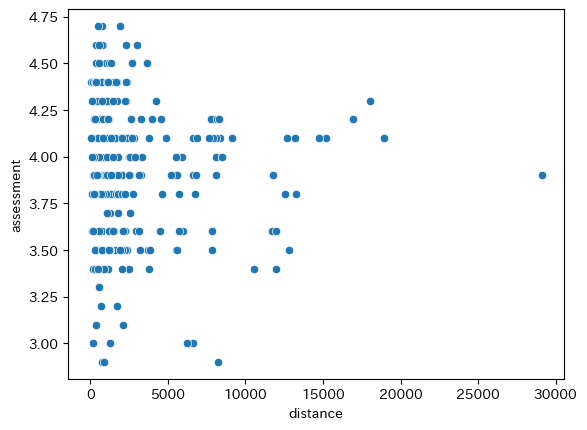

In [5]:
# 相関係数を可視化
sns.scatterplot(x='distance', y='assessment', data=df)
plt.show()